## This is the introduction <a name="introduction"></a>
Some introduction text, formatted in heading 2 style

# Table of contents
1. [Introduction](#introduction)
2. [Some paragraph](#paragraph1)
    1. [Sub paragraph](#subparagraph1)
3. [Another paragraph](#paragraph2)

## Some paragraph <a name="paragraph1"></a>
The first paragraph text

### Sub paragraph <a name="subparagraph1"></a>
This is a sub paragraph, formatted in heading 3 style

## Another paragraph <a name="paragraph2"></a>
The second paragraph text

#Imports

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the congifs of the plots

#Read in the data
df = pd.read_csv(r'C:\Users\Jonbi\Desktop\Data\movies.csv')

#--Begin Data Cleaning Process--
#Looking at first few lines of df

In [20]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#Viewing data types of each column (attribute)

In [21]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

#Defining a function that finds the percentage of missing data for each column

In [22]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


#Removing rows with missing data

In [23]:
df = df.dropna()

#Checking to make sure the rows with missing data were removed using the percent_missing function defined earlier

In [24]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


#Changing the data types for budget and gross columns

In [25]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

#The year column often doesnt match the released column. Need to create a new year column based on the year specified in the released column
#Defining a function that changes the year column datatype into a string and creates a new column (year_correct) based on the year column

In [26]:
df['year_corrected'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


#Checking for duplicates by finding rows with matching name and released attributes. None found.

In [27]:
df[df[['name', 'released']].duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected


#Sorting the dataframe by company name

In [28]:
df.sort_values(by=['company'], inplace=False, ascending=True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
4345,A Man Apart,R,Action,2003,"April 4, 2003 (United States)",6.1,46000.0,F. Gary Gray,Christian Gudegast,Vin Diesel,United States,36000000,44350926,"""DIA"" Productions GmbH & Co. KG",109.0,2003
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000.0,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112.0,2020
3024,Schizopolis,Not Rated,Comedy,1996,"April 9, 1997 (United States)",6.8,5300.0,Steven Soderbergh,Steven Soderbergh,Steven Soderbergh,United States,250000,10580,.406 Production,96.0,1997
2929,Jingle All the Way,PG,Adventure,1996,"November 22, 1996 (United States)",5.6,95000.0,Brian Levant,Randy Kornfield,Arnold Schwarzenegger,United States,60000000,129832389,1492 Pictures,89.0,1996
3525,Bicentennial Man,PG,Comedy,1999,"December 17, 1999 (United States)",6.9,112000.0,Chris Columbus,Isaac Asimov,Robin Williams,United States,100000000,87423861,1492 Pictures,132.0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,Upstream Color,Not Rated,Drama,2013,"August 30, 2013 (United Kingdom)",6.7,32000.0,Shane Carruth,Shane Carruth,Amy Seimetz,United States,50000,587174,erbp,96.0,2013
6793,Dope,R,Adventure,2015,"June 19, 2015 (United States)",7.2,82000.0,Rick Famuyiwa,Rick Famuyiwa,Shameik Moore,United States,7000000,17986781,i am OTHER,103.0,2015
4007,The Deep End,R,Crime,2001,"August 31, 2001 (United States)",6.6,11000.0,Scott McGehee,Elisabeth Sanxay Holding,Tilda Swinton,United States,3000000,10031529,i5 Films,101.0,2001
5664,Incendies,R,Drama,2010,"January 12, 2011 (France)",8.3,158000.0,Denis Villeneuve,Denis Villeneuve,Lubna Azabal,Canada,6800000,7099598,micro_scope,131.0,2011


#Checking company data for typos, duplicates etc 

In [29]:
print(df['company'].value_counts())

Universal Pictures                     330
Columbia Pictures                      302
Warner Bros.                           298
Paramount Pictures                     279
Twentieth Century Fox                  209
                                      ... 
Cinépix Film Properties (CFP)            1
Intermedia Films                         1
Dollface                                 1
Calimari Productions                     1
Beijing Diqi Yinxiang Entertainment      1
Name: company, Length: 1475, dtype: int64


#--Starting Correlation Testing--
#Building a correrlation matrix to check for correlations. 
#We can see that the strongest correlation is between budget and gross, with a weaker correlation existing between gross and votes. 

Text(86.09375, 0.5, 'Movie Features')

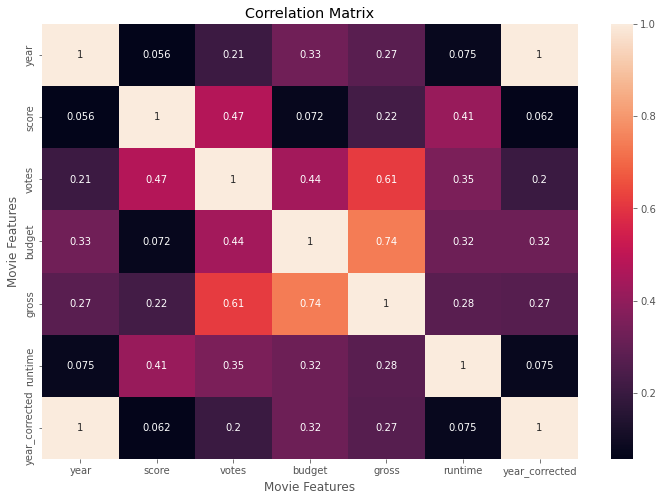

In [30]:

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

#Data also contains many categorical attribrutes that may be correlated.
#This function convert categorical data into integers so that we can check for correlations.

In [31]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

#Now we can plot a larger correlation matrix that includes the categorical attributes

Text(86.09375, 0.5, 'Movie Features')

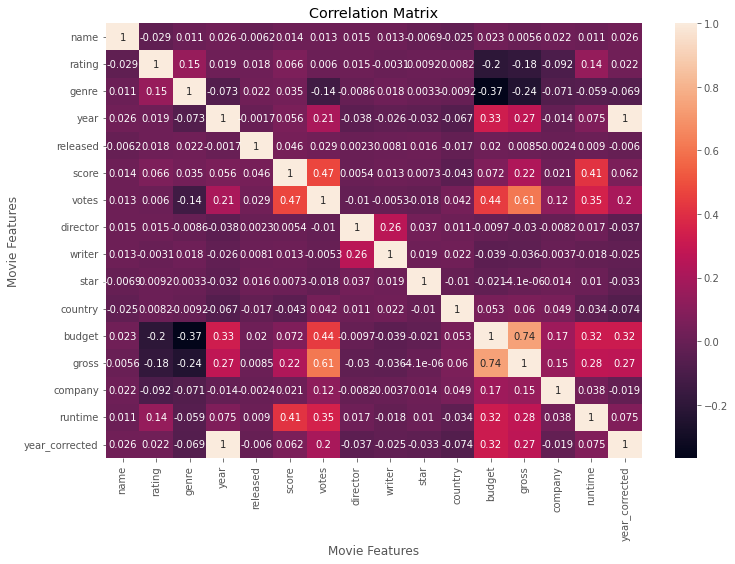

In [32]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

#Using a scatter plot to visualize the correlation between budget and gross.

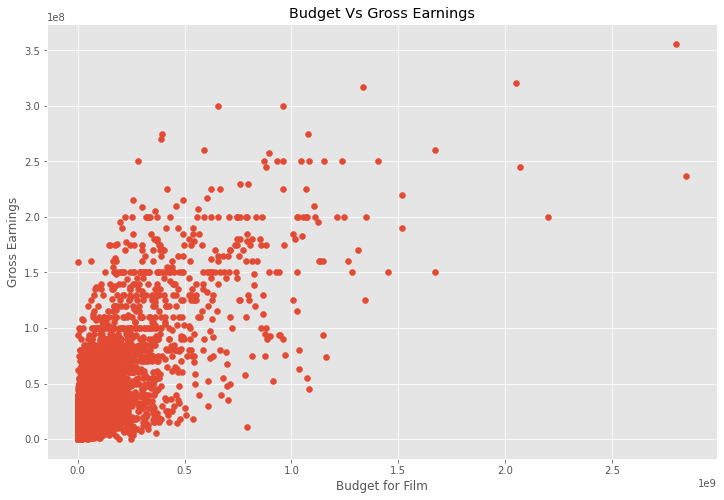

In [33]:
plt.scatter(x=df['gross'], y=df['budget'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

#stuff here

In [34]:
correlation_matrix_text = df_numerized.corr()
correlation_pairs = correlation_matrix_text.unstack()
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

genre           budget           -0.368523
budget          genre            -0.368523
gross           genre            -0.244101
genre           gross            -0.244101
rating          budget           -0.203946
                                    ...   
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
Length: 256, dtype: float64

stuff here

In [35]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

gross           votes             0.614751
votes           gross             0.614751
gross           budget            0.740247
budget          gross             0.740247
year            year_corrected    0.998726
year_corrected  year              0.998726
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64

Conclusion